<a href="https://colab.research.google.com/github/Abinayak03/Machine_learning/blob/main/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement

You are a data scientist working on a classification problem to predict whether a hotel reservation will be canceled or not. You have been provided with a dataset named **`"hotel_reservations.csv"`**, which includes various attributes related to hotel bookings. The dataset comprises the following columns:

- `booking_id:` unique identifier of each booking
- `no_of_adults:` Number of adults
- `no_of_children:` Number of Children
- `no_of_weekend_nights:` Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `no_of_week_nights:` Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `type_of_meal_plan:` Type of meal plan booked by the customer
- `required_car_parking_space:` Does the customer require a car parking space? (0 - No, 1- Yes)
- `room_type_reserved:` Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels
- `lead_time:` Number of days between the date of booking and the arrival date
- `arrival_year:` Year of arrival date
- `arrival_month:` Month of arrival date
- `arrival_date:` Date of the month
- `market_segment_type:` Market segment designation
- `repeated_guest:` Is the customer a repeated guest? (0 - No, 1- Yes)
- `no_of_previous_cancellations:` Number of previous bookings that were canceled by the customer prior to the current booking
- `no_of_previous_bookings_not_canceled:` Number of previous bookings not canceled by the customer prior to the current booking
- `avg_price_per_room:` Average price per day of the reservation; prices of the rooms are dynamic (in euros)
- `no_of_special_requests:` Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- `booking_status:` Flag indicating if the booking was canceled or not (Not_Canceled = 0, Canceled = 1)


You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, random forest, and Naive Bayes. Additionally, you will implement k-fold cross-validation, stratified k-fold cross-validation, grid search, and randomized search techniques.

**Dataset Credits:** Ahsan Raza (https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)

**Import Necessary Libraries**


In [14]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Data Preprocessing and EDA

1. Import the data from the `"hotel_reservations.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
5. Remove the columns `booking_id, arrival_year, arrival_month, and arrival_date` as they do not add significant value to the predictive model.
6. Visualize the booking_status using a count plot.
7. Visualize the lead time for canceled and not canceled bookings using a box plot.
8. Visualize the average price per room for canceled and not canceled bookings using a box plot.
9. Encode categorical variables: type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.

In [15]:
# Import the data from the "hotel_reservations.csv" file and store it in a variable df.
df=pd.read_csv("hotel_reservations.csv")

# Display the number of rows and columns in the dataset
print(df.shape)

# Display the first few rows of the dataset to get an overview
df.head()

(36275, 19)


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [16]:
df.drop(['booking_id', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1, inplace=True)

In [17]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled


In [18]:
df.shape

(36275, 15)

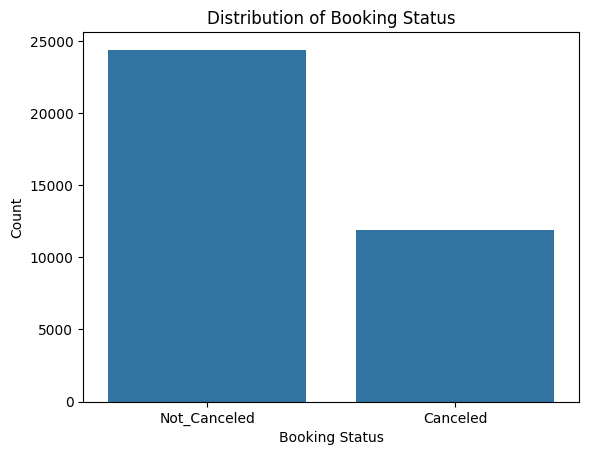

In [19]:
# Visualize the booking_status
sns.countplot(x='booking_status', data=df)
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Distribution of Booking Status')
plt.show()

In [20]:
df.booking_status.value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


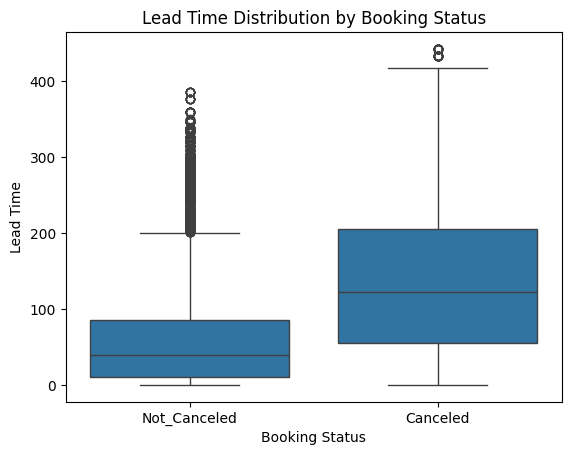

In [21]:
# Visualize the lead time for canceled and not canceled bookings using a box plot
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.title('Lead Time Distribution by Booking Status')
plt.show()

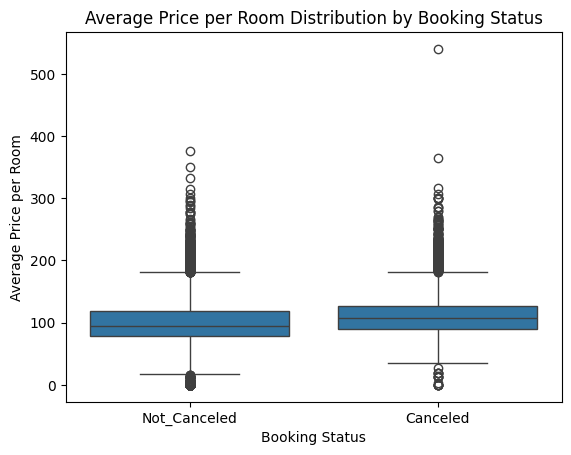

In [22]:
# Visualize the average price per room for canceled and not canceled bookings
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.xlabel('Booking Status')
plt.ylabel('Average Price per Room')
plt.title('Average Price per Room Distribution by Booking Status')
plt.show()


In [23]:
# Encode categorical variables : type_of_meal_plan, room_type_reserved, and market_segment_type using one-hot encoding.
df=pd.get_dummies(df,columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True


### Task 2: Feature Scaling

1. Standardize the numerical features `lead_time` and `avg_price_per_room`.
2. Define features (X) and target (y).

In [24]:
# Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['lead_time','avg_price_per_room']]=scaler.fit_transform(df[['lead_time','avg_price_per_room']])
df.head()
print(df.shape)
# Define features(X) and target (y: booking_status)
X=df.drop('booking_status', axis=1)
y=df['booking_status']


(36275, 25)


### Task 3: Implementing K-Fold Cross Validation

1. Initialize a KFold cross-validator with 7 splits.
2. Perform k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform k-fold cross-validation using a decision tree classifier and calculate the average accuracy.

In [25]:

# Initialize KFold with 7 splits.
from sklearn.model_selection import KFold
kf=KFold(n_splits=7,shuffle=True,random_state=42)
print('Naive Bayes')
# Cross validation with Naive Bayes
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
scores=cross_val_score(nb,X,y,cv=kf)
print(scores)
print(np.mean(scores))
print()
# Cross validation with Logistic Regression
from sklearn.linear_model import LogisticRegression
print('logistic regression')
lr=LogisticRegression(max_iter=1000)
scores=cross_val_score(lr,X,y,cv=kf)
print(scores)
print(np.mean(scores))
print()
# Cross validation with Decision Tree
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree')
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,X,y,cv=kf)
print(scores)
print(np.mean(scores))


Naive Bayes
[0.41115184 0.41605558 0.40119645 0.41605558 0.41084523 0.4000386
 0.40486299]
0.4086008945293444

logistic regression
[0.80223809 0.80470861 0.80181397 0.79891934 0.79370899 0.79544577
 0.80663836]
0.8004961614907081

Decision Tree
[0.85163033 0.86684678 0.85526824 0.85565419 0.8602856  0.85353146
 0.85681204]
0.8571469473912464


### Task 4: Implementing Stratified K-Fold Cross Validation

1. Initialize a StratifiedKFold cross-validator with 7 splits
2. Perform stratified k-fold cross-validation using Naive Bayes and calculate the average accuracy.
3. Perform stratified k-fold cross-validation using a Logistic Regression and calculate the average accuracy.
4. Perform stratified k-fold cross-validation using a Decision Tree classifier and calculate the average accuracy.

In [26]:
# Initialize a StratifiedKFold cross-validator with 7 splits
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=7,shuffle=True,random_state=42)
print('Naive Bayes')

# Perform stratified k-fold cross-validation using Naive Bayes
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
scores=cross_val_score(nb,X,y,cv=skf)
print(scores)
print(np.mean(scores))
print()


# Perform stratified k-fold cross-validation using a Logistic Regression
from sklearn.linear_model import LogisticRegression
print('logistic regression')
lr=LogisticRegression(max_iter=1000)
scores=cross_val_score(lr,X,y,cv=skf)
print(scores)
print(np.mean(scores))
print()


# Perform stratified k-fold cross-validation using a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
print('Decision Tree')
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,X,y,cv=skf)
print(scores)
print(np.mean(scores))


Naive Bayes
[0.4094154  0.41142416 0.41026631 0.40524894 0.40428406 0.40428406
 0.41547665]
0.40862851035462067

logistic regression
[0.79934401 0.7944809  0.8103049  0.79930529 0.79544577 0.79949826
 0.79930529]
0.799669202624214

Decision Tree
[0.86243488 0.84947897 0.86549595 0.85546121 0.85507526 0.86279429
 0.8666538 ]
0.8596277654826247


### Task 5: Implementing Grid Search CV

1. Initialize GridSearchCV with Naive Bayes and Random Forest:
    - Naive Bayes: var_smoothing [1e-9, 1e-8, 1e-7]
    - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15]
<br></br>
2. Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
3. Print the best parameters for each model.

In [32]:
# Initialize GridSearchCV with Naive Bayes and Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
nb=GaussianNB()
rf=RandomForestClassifier()


# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
models={'Naive_bayes':{'model':nb,'params':{'var_smoothing':[1e-9,1e-8]}},'Random_forest':{'model':rf,'params':{'n_estimators':[10,50,100],'max_depth':[5,10,15]}}}
avg=[]
for key,data in models.items():
  grid_search=GridSearchCV(data['model'],data['params'],cv=5,return_train_score=False)
  grid_search.fit(X,y)
  avg.append({
        'model': key,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    })
# Print the best parameters for each model.
df_scores = pd.DataFrame(avg, columns=["model", "best_score", "best_params"])
df_scores

,model,best_score,best_params
0,Naive_bayes,0.408932,{'var_smoothing': 1e-08}
1,Random_forest,0.876058,"{'max_depth': 15, 'n_estimators': 100}"


### Task 6: Implementing Randomized Search CV

1. Initialize RandomizedSearchCV for RandomForest with the given parameters:
   - Random Forest: n_estimators [10, 50, 100], max_depth [5, 10, 15, 20]
<br></br>
2. Fit RandomizedSearchCV with RandomForest model and find the best parameters.
2. Print the best parameters.

In [34]:
# Initialize RandomizedSearchCV and fit with RandomForest model
from sklearn.model_selection import RandomizedSearchCV
r_search_cv=RandomizedSearchCV(rf,{'n_estimators':[10,50,100],'max_depth':[5,10,15,20]},cv=5,return_train_score=False,n_iter=4)
r_search_cv.fit(X,y)
print(r_search_cv.best_params_)
# Print the best parameters for each model.
df2=pd.DataFrame(r_search_cv.cv_results_)
df2.head()



{'n_estimators': 50, 'max_depth': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.705766,0.130240,0.040517,0.009742,50,5,"{'n_estimators': 50, 'max_depth': 5}",0.803722,0.807167,0.784149,0.795176,0.800000,0.798043,0.008007,4
1,1.355335,0.147084,0.082000,0.003009,50,20,"{'n_estimators': 50, 'max_depth': 20}",0.880221,0.890696,0.885872,0.892901,0.883115,0.886561,0.004687,1
2,0.475045,0.313014,0.042072,0.014961,10,20,"{'n_estimators': 10, 'max_depth': 20}",0.877739,0.881048,0.881599,0.888904,0.878704,0.881599,0.003923,2
3,0.687229,0.444567,0.047588,0.020923,10,15,"{'n_estimators': 10, 'max_depth': 15}",0.869469,0.873329,0.870296,0.879118,0.868780,0.872198,0.003792,3


In [35]:
df2[['params','mean_test_score']]

,params,mean_test_score
0,"{'n_estimators': 50, 'max_depth': 5}",0.798043
1,"{'n_estimators': 50, 'max_depth': 20}",0.886561
2,"{'n_estimators': 10, 'max_depth': 20}",0.881599
3,"{'n_estimators': 10, 'max_depth': 15}",0.872198
